In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)
df = pd.read_csv('indeed_job_dataset_short.csv')

In [4]:
df.shape

(5715, 12)

In [5]:
list(df.head())

['Salary1',
 'Salary2',
 'Job_Type',
 'Skill',
 'No_of_Skills',
 'No_of_Reviews',
 'No_of_Stars',
 'Date_Since_Posted',
 'Location',
 'Revenue',
 'Employees',
 'Industry']

In [6]:
cat_list=['Salary1',
 'Location',
 'Revenue',
 'Employees',
 'Industry']

In [7]:
df_noskill = df.drop(['Skill'], axis=1)

In [8]:
df_skill = df['Skill'].str.get_dummies(sep=', ')
df_skill = df_skill.add_prefix('skill_')

In [10]:
df_skill.head()

,skill_ Project / Program Management,"skill_""Drivers License""",skill_.Net,skill_3G,skill_4G/LTE,skill_ACH,skill_ADAS,skill_AI,skill_AJAX,skill_APICS Certification,skill_AWS,skill_Accounting,skill_Acquisition Strategy,skill_Active Directory,skill_Adobe Acrobat,skill_Adobe Creative Suite,skill_Adobe InDesign,skill_Adobe Marketing,skill_Adobe Photoshop,skill_Affiliate Marketing,skill_Agriculture,skill_Akka,skill_Alteryx,skill_Analysis Skills,skill_Android,skill_Angular,skill_Ansible,skill_Ant,skill_Apache,skill_Application Support,skill_ArcGIS,skill_Attribution Modeling,skill_Audits,skill_Aviation Experience,skill_Azure,skill_B2B Sales,skill_BC/BE,skill_BGP,skill_Basic Computer Skills,skill_Big Data,skill_Bilingual,skill_Bioinformatics,skill_Biostatistics,skill_Bootstrap,skill_Build Automation,skill_Business Analysis,skill_Business Intelligence,skill_Business Management,skill_Business Process Reengineering,skill_C#,skill_C/C++,skill_CAD,skill_CAD Software,skill_CCDA,skill_CCNA,skill_CCNA Security,skill_CCNP,skill_CDISC Standards,skill_CEH,skill_CFE,skill_CGMP,skill_CI,skill_CI/CD,skill_CISM,skill_CISSP,skill_CPA,skill_CPHQ,skill_CPT Coding,skill_CSS,skill_CSSLP,skill_Calculus,skill_Calibration,skill_Cash Flow Analysis,skill_Cassandra,skill_Cell Biology,skill_CentOS,skill_Cerner,skill_Certified Compensation Professional,skill_Certified Compliance And Ethics Professional,skill_Certified Information Systems Auditor,skill_Certified Internal Auditor,skill_Certified Management Accountant,skill_Certified Project Manager,skill_Certified Scrum Master,skill_Change Management,skill_Chartered Financial Analyst,skill_Chef,skill_Cisco Routers,skill_Clean Driving Record,skill_Clinical Research,skill_Clinical Trials,skill_Clojure,skill_Cloud Computing,skill_Coaching Experience,skill_CompTIA Network+,skill_CompTIA Security+,skill_Compliance Management,skill_Computer Graphics,skill_Conflict Management,skill_Confluence,skill_Content Management Systems,skill_Continuous Improvement,skill_Control-M,skill_Conversion Optimization,skill_Cordova,skill_Crystal Reports,skill_Customer Segmentation,skill_Customer Service,skill_Cybersecurity,skill_DB2,skill_DHCP,skill_DNS,skill_Data Analysis,skill_Data Management,skill_Data Mining,skill_Data Science,skill_Data Warehouse,skill_Database Administration,skill_Database Marketing,skill_Design Controls,skill_Design Experience,skill_Design Patterns,skill_Digital Marketing,skill_Distributed Control Systems,skill_DoD 8570,skill_Docker,skill_Doubleclick,skill_Drupal,skill_DynamoDB,skill_E-Commerce,skill_ERP Systems,skill_Eclipse,skill_Elasticsearch,skill_Ellucian,skill_Email Marketing,skill_Embedded Software,skill_Ember,skill_Employee Evaluation,skill_Enrolled Agent,skill_Epic,skill_Epic Certification,skill_Epidemiology,skill_Erlang,skill_Excel,skill_Experimental Design,skill_FINRA License,skill_FIPS,skill_FISMA,skill_FPGA,skill_FTP,skill_Facebook Advertising,skill_FedRAMP,skill_FileMaker,skill_Financial Accounting,skill_Financial Modeling,skill_Firewall,skill_Fortran,skill_Front-End Development,skill_GAAP,skill_GIS,skill_GPEN,skill_GSEC,skill_Genetics,skill_Git,skill_Go,skill_Google AdWords,skill_Google Analytics,skill_Google Cloud Platform,skill_Google Search Console,skill_Google Suite,skill_Grant Writing,skill_GraphQL,skill_HBase,skill_HDI Certification,skill_HP ALM,skill_HTML5,skill_HTTPS,skill_Hadoop,skill_Haskell,skill_Heroku,skill_Hibernate,skill_Hive,skill_HubSpot,skill_Hyperion,skill_IAT,skill_IAT Level I,skill_IAT Level II,skill_ICD Coding,skill_ICD-10,skill_ICD-9,skill_ICU,skill_IDS,skill_IFRS,skill_IIS,skill_IPsec,skill_ISO 9001,skill_IT Experience,skill_ITIL,skill_IVR,skill_IaaS,skill_Identity And Access Management,skill_Image Processing,skill_Immunoassays,skill_InVision,skill_Informatica,skill_Information Security,skill_Integrated Library System,skill_Intelligence Community Experience,skill_Intelligence Experience,skill_Internal Audits,skill_JBoss,skill_JD Edwards,skill_JNCIA,skill_JSON,skill_Java,skill_J

In [11]:
df_noskill.head()

,Salary1,Salary2,Job_Type,No_of_Skills,No_of_Reviews,No_of_Stars,Date_Since_Posted,Location,Revenue,Employees,Industry
0,less than80000,80000,data_scientist,2,3301.0,3.3,1.0,MO,more than $10B,"10,000+",Health Care
1,less than80000,80000,data_scientist,5,NaN,NaN,15.0,TX,NaN,NaN,NaN
2,less than80000,80000,data_scientist,9,62.0,3.5,1.0,OR,NaN,NaN,NaN
3,less than80000,80000,data_scientist,1,158.0,4.3,30.0,DC,NaN,NaN,Government
4,less than80000,80000,data_scientist,7,495.0,4.1,30.0,TX,NaN,"less than 10,000",Banks and Financial Services


In [12]:
df_noskill_dum = pd.get_dummies(df_noskill,prefix=['Sal_','Type_','loc_', 'Rev_','Emp_','Indu'])

In [13]:
df_new = pd.concat([df_noskill_dum,df_skill], axis=1)

In [14]:
df_new = pd.concat([df_noskill_dum,df_skill], axis=1)

In [15]:
df_new2 = pd.concat([df['Salary1'].to_frame(),df_new],axis=1)

In [16]:
df_skill_only = pd.concat([df['Salary2'],df_skill], axis=1)

In [17]:
df_skill_only.dropna(inplace=True)

In [18]:
df_new2.dropna(inplace=True)

In [19]:
#df_new.to_csv(r'df_new.csv')

In [20]:
df_new.columns[5:11]

Index(['Sal__100000-119999', 'Sal__120000-139999', 'Sal__140000-159999',
       'Sal__80000-99999', 'Sal__less than80000', 'Sal__more than160000'],
      dtype='object')

In [32]:
feature_name = list(df_skill_only.drop(columns=['Salary2']).columns)

In [22]:
feature_name.remove('Salary2')

In [33]:
df_new2['Salary1'].unique()

array(['less than80000', '80000-99999', '100000-119999', '120000-139999',
       '140000-159999', 'more than160000'], dtype=object)

In [34]:
X = df_skill_only.drop(columns=['Salary2'])
y = df_skill_only['Salary2']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
def feature_sampling_scores (max_features_list):
    feature_sampling_scores_list = []
    for max_feature in max_features_list:
        rfr = RandomForestRegressor(max_features=max_feature, random_state=1,n_estimators=10)
        rfr.fit(X_train, y_train)
        score = (max_feature, rfr.score(X_val,y_val))
        feature_sampling_scores_list.append(score)
    return feature_sampling_scores_list

In [37]:
feature_sampling_scores([0.5,'log2','sqrt',None])

[(0.5, 0.40566906960645754),
 ('log2', 0.45071854640391573),
 ('sqrt', 0.45821799142058295),
 (None, 0.41668072720939753)]

### Feature Importances

In [38]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 6, max_features=0.5, min_samples_leaf=8).fit(X_train, y_train)

In [39]:
rfr.score(X_val, y_val)

0.36339668352970966

In [40]:
importance_numbers = rfr.feature_importances_
importance_list = importance_numbers.tolist()
importances = np.vstack((feature_name, importance_list))
importances = pd.Series(importance_list, index = feature_name)
importances.sort_values(ascending=False)

skill_Machine Learning                                0.195632
skill_Spark                                           0.141442
skill_Python                                          0.132525
skill_Hadoop                                          0.113932
skill_AWS                                             0.040611
skill_Java                                            0.035821
skill_Excel                                           0.030902
skill_Tableau                                         0.025519
skill_SQL                                             0.025480
skill_Data Mining                                     0.017447
skill_TS/SCI Clearance                                0.017387
skill_Scala                                           0.016432
skill_R                                               0.015501
skill_Leadership Experience                           0.014586
skill_Microsoft Office                                0.014025
skill_Microsoft Powerpoint                            0

In [42]:
import xgboost as xgb

X = df_skill_only.drop(columns=['Salary2'])
y = df_skill_only['Salary2']

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=200, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.409449


### Decision trees as base learners

In [43]:
from sklearn.metrics import mean_squared_error
X = df_new2[feature_name]
y = df_new2['Salary2']

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor()

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[09:05:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/jz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE: 19594.598248


### Linear base learners

In [44]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

[09:05:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/jz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE: 26330.368420


### Evaluating model quality

In [45]:
# Create the DMatrix: housing_dmatrix
dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

[09:05:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/jz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/jz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[09:05:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:05:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:05:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:05:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:05:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best rmse as a function of l2:
    l2          rmse
0    1  28600.079101
1   10  29265.640625
2  100  32189.109375


### Visualizing individual XGBoost trees

### Visualizing feature importances: What features are most important in my dataset

In [47]:
X = df_skill_only.drop(columns=['Salary2'])
y = df_skill_only['Salary2']

# Create the parameter dictionary: params
params = {"objective":"reg:linear","max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=xgb.DMatrix(data=X, label=y), num_boost_round=10)

[09:07:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [52]:
# Plot the feature importances
from matplotlib import pyplot as plt

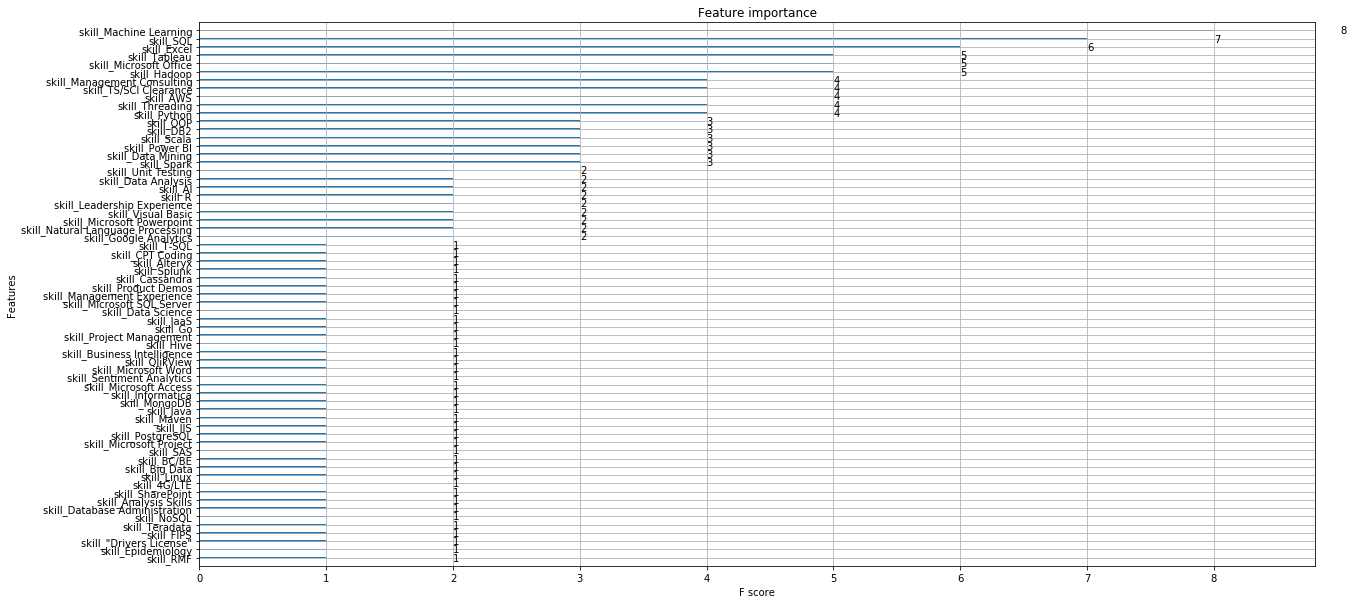

In [69]:
xgb.plot_importance(xg_reg)
plt.rcParams["figure.figsize"] = (25,10)
plt.show()

In [76]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:linear", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

/Users/jz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/jz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[09:37:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:37:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:38:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:38:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:38:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:38:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:38:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:38:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:38:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [77]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix,num_boost_round=50,metrics='rmse',as_pandas=True, seed=123, params=params)

# Print cv_results
print(cv_results)

[09:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0      85156.971354      266.062914    85203.476562     790.588792
1      61524.128906      195.026791    61588.878906     846.456707
2      45569.739583      154.028731    45665.809896     838.922414
3      35089.290364      120.403587    35272.214844     773.648721
4      28478.763672      113.616440    28725.917317     681.699788
5      24499.227214      127.426245    24856.936849     556.892833
6      22200.460286      109.192520    22657.946615     468.416915
7      20916.315755      123.612078    21459.447266     382.368830
8      20194.077474      111.793895    20810.9908

### XGBoost hyperparameters 

In [79]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix,
    params=params, nfold=5, num_boost_round=10, metrics='rmse',as_pandas=True,seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

[09:47:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:47:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:47:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:47:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:47:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

### Tuning max_depth

In [80]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:linear"}

# Create list of max_depth values
max_depths = [2,5,10,20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["rmse"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix,
    params=params, nfold=5, num_boost_round=10, metrics='rmse',as_pandas=True,seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

[09:49:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:49:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:49:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:49:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:49:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:49:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:49:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:49:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:49:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

### Tuning colsample_bytree

Now, it's time to tune "colsample_bytree". You've already seen this if you've ever worked with scikit-learn's RandomForestClassifier or RandomForestRegressor, where it just was called max_features. In both xgboost and sklearn, this parameter (although named differently) simply specifies the fraction of features to choose from at every split in a given tree. In xgboost, colsample_bytree must be specified as a float between 0 and 1.

In [81]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:linear","max_depth":3}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1,0.5,0.8,1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params['rmse'] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

[09:50:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:50:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:50:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:50:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:50:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:50:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:50:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:50:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
   colsample_bytree     best_rmse
0               0.1  20764.251953
1   